# Chapter 1: The philosophy of Bayesian inference  
- The Bayesian world-view interprets probability as measure of believability in an event, that is, how confident we are in an event occurring.  
    - v.s. Frequentist assume the probability is the long-run frequency of events.  
- Bayesian inference is simply updating your beliefs after considering new evidence.   
  
For more rigrous and detailed explanation, see [the original](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC_current.ipynb).  
Let's see how our beliefs update after considering new evidence = new incoming data with a coin flip example.

## Example 1: Coin flip

Let's say we have one coin. We flip the coin and see if it results in head (denotes an event H from here) or tail (T as well).  
- Though we believe the probability of resulting in head (H), $p$, would be $0.5$, it's not proved and thus true $p$ is unknown paramter.  
- Bayesian inteprets $p$ has a distribution - i.e. it would be $p = 0.1$ with probability $0.01$, $p = 0.2$ with probability $0.02$ ... etc.  
- And the distribution will be updating as we observe occurence of events - i.e. how many times we flipp the coin.  
  

Let's see how it goes with Python simulation.  

In [6]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

plt.style.use('ggplot')
figsize(16, 9)

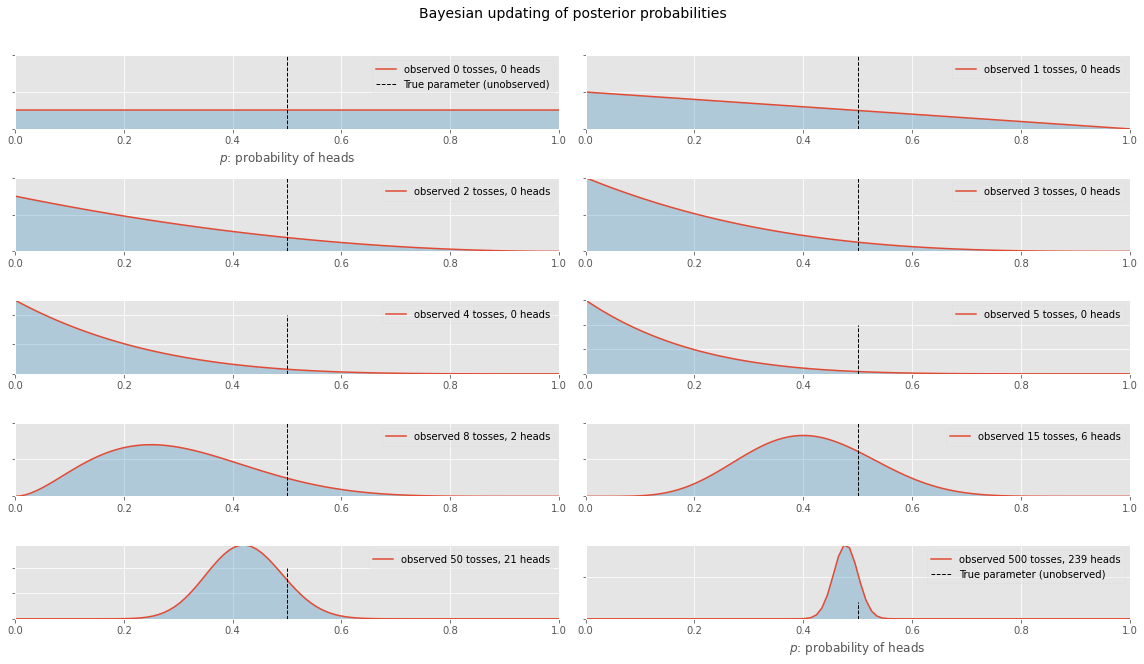

In [7]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
p = 0.5  # Unkown = Unoberservable true parameter.

data = stats.bernoulli.rvs(p, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sub = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$: probability of heads") if k in [0, len(n_trials)-1] else None
    plt.setp(sub.get_yticklabels(), visible=False)
    heads = data[:N].sum()  # last N of data is the results of observed event occurence.

    # Liklihood of prob p = x when heads observed.
    # We assusme an universal distribution p = 1 for all x as a prior.  
    # Then, we use beta distribution as likehood because it stands binary occurence well.
    # Thus, the posterior distribution becomes $ beta * universal = beta(x, heads) * 1 $.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)

    # plot posterior distribution.
    plt.plot(x, y, label=f"observed {N:d} tosses, {heads:d} heads")
    plt.fill_between(x, 0, y, color="#348ABD", alpha=.3)
    if k in [0, len(n_trials)-1]:
        plt.vlines(p, 0, 4, color="k", linestyles="--", lw=1, label="True parameter (unobserved)")
    else:
        plt.vlines(p, 0, 4, color="k", linestyles="--", lw=1)

    legend = plt.legend()
    legend.get_frame().set_alpha(0.3)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
plt.tight_layout()


## Example 2: Bug, or just sweet, unintended feature?
Let's say we have a code which we'd like to indentify if there's bug in it.  
  
- $A$ denotes the event that our code has **no bugs** in it.  
- $X$ denotes the event that the code passed all debugging tests.  
  
With that, we'd like to know $P(A|X)$, i.e. the probability of no bugs for given our debugging tests $X$.  
According to Bayes theorem, we are able to get $P(A|X)$ from following fomula:  

\begin{align}
P( A | X ) =& \ \frac{ P(X | A) P(A) }{P(X) } \tag{1} \\
        \propto & \ P(X | A) P(A) \ \ \ (\propto \ \text{means proportional to }) \tag{2} \\
\end{align}

where  
- $P(A)$ is the prior probability of no bugs. We assign a variable $p$ for it.  
- $P(X|A)$ the probability that the code passes $X$ tests for given $A$.

But for $A$, i.e. without any bugs in the code, it should be $P(X|A) \ = \ 1$ i.e. the code passes will all tests.  
$P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs (denoted $\sim A$, spoken *not $A$*), or event $X$ without bugs ($A$).  
$P(X)$ can be represented as:


\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \tag{3} \\
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A) \tag{4} \\
& = P(X|A)p + P(X | \sim A)(1-p) \tag{5}
\end{align}

$P(X|A) \ = \ 1$ as we noted above, $P(X|\sim A)$ is subjective.  
Our code can pass tests but still have a bug in it, though the probability there is a bug present is reduced. Note this is dependent on the number of tests performed, the degree of complication in the tests, etc. Let's be conservative and assign $P(X|A) \ = \ 0.5$. Then


\begin{align}
P(A|X) & = \frac{1 \cdot p}{1 \cdot p + 0.5(1 \ - \ p)} \tag{6} \\
 & = \frac{2p}{1+p} \tag{7}
\end{align}

This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

Text(0.5, 1.0, 'Are there bugs in my code?')

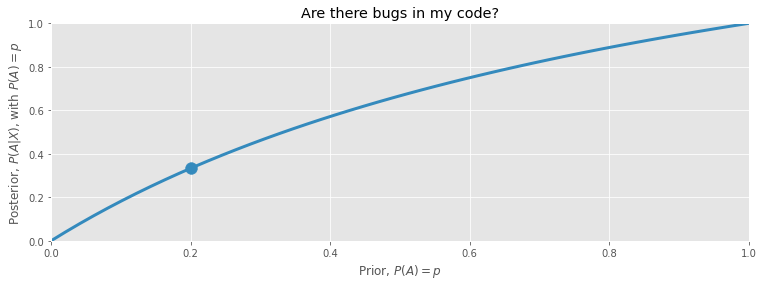

In [9]:
p = np.linspace(0, 1, 50)
p_a_x = (2*p)/(1+p)

figsize(12.5, 4)
plt.plot(p, p_a_x, color="#348ABD", lw=3)
plt.scatter(0.2, (2*0.2)/(1+0.2), s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?")

Similarly, our posterior is also a probability, with $P(A|X)$ the probability there is no bug given we saw all tests pass, hence  
$1 \ - \ P(A|X)$ is the probability there is a bug given all tests passed. What does our posterior probability look like? Below is a chart of both the prior and the posterior probabilities.

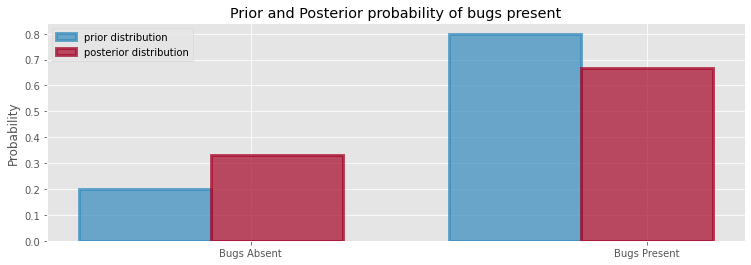

In [18]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1/3, 2/3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw=3, edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw=3, edgecolor=colours[1])
 
plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])

plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left")

## Example 3: Inferring behavior from text-message data
Problem statement:  
  
You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below.  
You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly.  
How can you model this?

(0.0, 74.0)

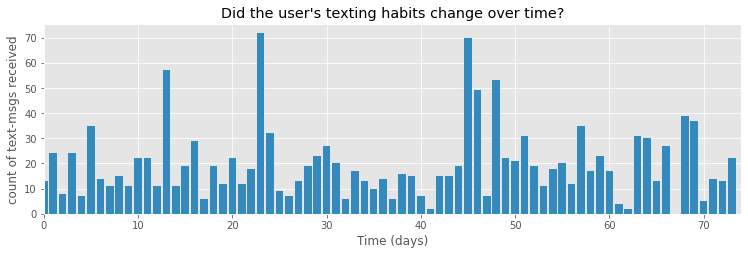

In [22]:
figsize(12.5, 3.5)
count_data = np.loadtxt("../../data/chapter-1/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

To model this incoming message behavior, we assume a probablity distribution for discrete numbers, i.e. Poisson distribution as follows:  


\begin{align}
C_i &\sim Poisson(\lambda) \tag{8} \\
Poisson(\lambda) &= P(Z=k) = \frac{\lambda^k e^{-\lambda} }{k!}, \ \ k=0, 1, 2, \dots \tag{9} 
\end{align}

where $C_i$ denotes counts of message for i-th day, $P(Z=k)$ is the probability where message counts $Z=k$.  
Next, as we would like to know if the message habits has changed over time, let's assume there are two $\lambda_1, \lambda_2$ values as follows:  

\begin{align}
\lambda &=
  \begin{cases}
  \lambda_1 \ \ \ \text{if } \ t \ \lt \tau \cr
  \lambda_2 \ \ \ \text{if } \ t \ \ge \tau 
  \end{cases} \tag{10}
\end{align}


If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$' s posterior distributions should look about equal.
To model the unknown parameter $\lambda$, we assume Exponential distribution for each $\lambda_1$ and $\lambda_2$ as $\lambda$ should be positive, continuous number.  

\begin{align}
\lambda_1 & \sim Exp(\alpha) \tag{11} \\
\lambda_2 & \sim Exp(\alpha) \tag{12}
\end{align}

where $\alpha$ is called a hyper-parameter or parent variable, would influences other parameters.   
As the $\alpha$ would not influence the entire model strongly, so we have flexibility in our choice.  
A good rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

\begin{align}
\frac{1}{N} \sum_{i=0}^N \ C_i \approx E[\ \lambda \ |\ \alpha \ ] = \frac{1}{\alpha} \nonumber
\end{align}


For $\tau$, because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a uniform prior belief to every possible day. This is equivalent to saying

\begin{align}
\tau & \sim DiscreateUniform(1, 70) \tag{13} \\
& \Rightarrow P( \tau = k ) = \frac{1}{70} \tag{14}
\end{align}

Next, we use PyMC to make Bayesian inference with above assumption. Specifically, we can code the model with PyMC notation as follows:

In [23]:
import pymc as pm

/Users/yukoga/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [24]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

    index = np.arange(n_count_data)
    lambda_ = pm.math.switch(tau > index, lambda_1, lambda_2)

    observation = pm.Poisson("obs", lambda_, observed=count_data)

Note that `pm.math.switch` returns the value `lambda_1` when $\tau > \text{index}$, whereas returns the value `lambda_2` when $\tau <= \text{index}$ for `lambda_`.  
The machinery being employed is called Markov Chain Monte Carlo (MCMC), which I also delay explaining until Chapter 3. This technique returns thousands of random variables from the posterior distributions of 
$\lambda_1$, $\lambda_2$ and $\tau$. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called traces in the MCMC literature) into histograms. 

In [25]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [lambda_1]
>Metropolis: [lambda_2]
>Metropolis: [tau]
CompoundStep
>Metropolis: [lambda_1]
>Metropolis: [lambda_2]
>Metropolis: [tau]
/Users/yukoga/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/yukoga/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/yukoga/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 35 seconds.


In [26]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [33]:
1/tau_samples.shape[0] * np.ones_like(tau_samples)

array([2.5e-05, 2.5e-05, 2.5e-05, ..., 2.5e-05, 2.5e-05, 2.5e-05])

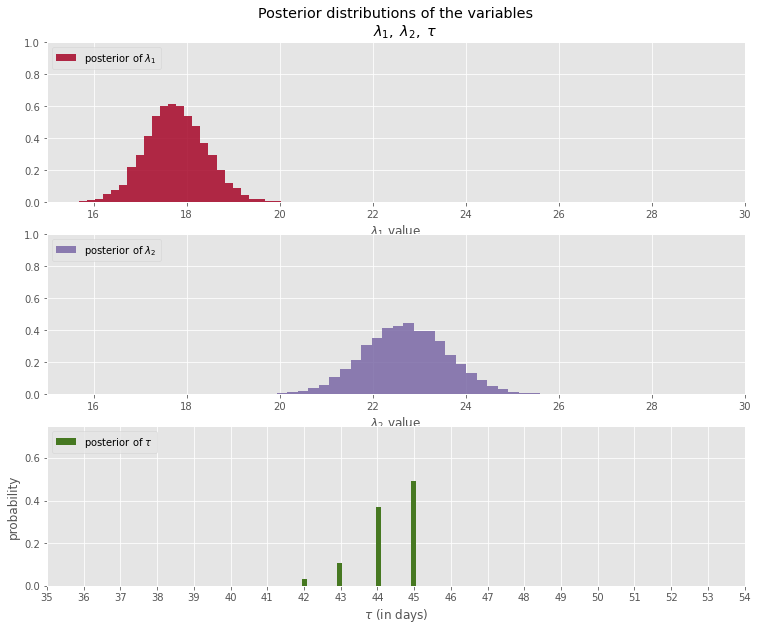

In [27]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

Interpretaion:  
For the analysis of $\lambda$:   
- Bayesian methodology returns a distribution. Hence we now have distributions to describe the unknown $\lambda$ s and $\tau$ as above.  
- We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$ s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.  
- Notice also that the posterior distributions for the $\lambda$ s do not look like exponential distributions, even though our priors for these variables were exponential.  
  

For the analysis of $\tau$:  
- $\tau$'s posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals.  
- We can see that near day 45, there was a 50% chance that the user's behaviour changed.  
- Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$.  
- In the actual results we see that only three or four days make any sense as potential transition points.



We'll use the posterior samples to answer the following question: what is the expected number of texts at day $t$ ?  
Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to what is the expected value of $\lambda$ at time $t$ ?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1_{,}i}$ if $t < \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2_{,}i}$.

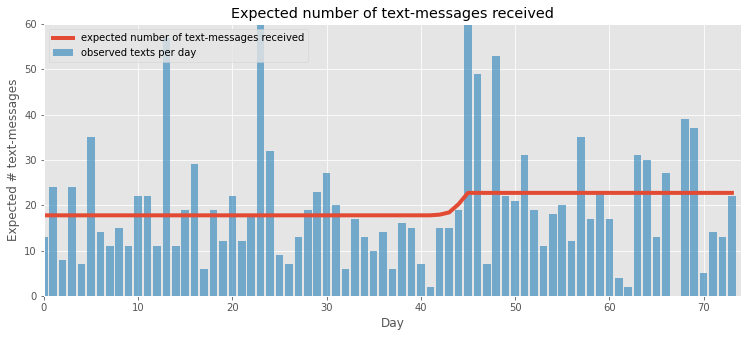

In [28]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left")